In [62]:
import numpy as np
np.set_printoptions(linewidth=100)
import sympy as sm
import sympy.abc as sbl
from scipy.sparse import diags
import scipy.sparse.linalg as la
import scipy.sparse as sp
sm.init_printing()
import time
import matplotlib.pyplot as plt
import matplotlib

# Hyperparameters

In [74]:
N = 4
h = 1 /N

# Domain

In [1]:
l = []

for i in range(N + 1):
    arr = np.array([0]* (N + 1))
    arr[i] = 1
    l.extend([np.linspace(0, 1, N+1), arr])
plt.figure(figsize=(20, 7))

plt.plot(*l, linewidth = 5)
plt.grid()

leg = plt.legend([r"$\phi_{}$".format(i) for i in range(N+1)],loc = 2, prop={'size': 20}, ncol=8,  bbox_to_anchor=(0, 1.2 ),   )

for i in range(N + 1):
    if i!=N :
        ann = plt.annotate(r'$ y = \frac {{-(x-{}h)}}{{h}}$'.format(i+1), xy =(i*h+h/4, 1-h), xytext=(i*h+h/8, 1-h), weight='bold', fontsize=10)
        ann.set_fontsize(20)
    if i!=0:
        ann = plt.annotate(r'$ y = \frac {{(x-{}h)}}{{h}}$'.format(i-1), xy = (i*h+h/4, 1-h), xytext=(i*h-h/2.2, 1-h-h/2))
        ann.set_fontsize(20)
        
x_ticks = plt.xticks(np.linspace(0, 1, N+1) , ["0"]+[f"{i}h" for i in range(1, N)]+[str(1)])
plt.savefig("1.png")

NameError: name 'N' is not defined

In [76]:
import IPython
IPython.__version__

'7.2.0'

## Equations 

\begin{equation}
\underline {System \ of \ equations :}
\\\ u_t + u  u_x + v_x + \beta u_{xx} = 0 
\\ v_t + (uv)_x - \beta v_{xx} = 0 
\end{equation}

\begin{equation}
\underline { Discrete \ Galerkin \ Solution :}
\\ u^h = 
\sum_{i= 0}^{n} a_i  \phi_i 
\end{equation}

\begin{equation}
\underline {System \ of \ equations :}
\\\ \int_0^1 { (w u_t + wu  u_x + wv_x + \beta w u_{xx})} \ dx= 0 
\\ \int_0^1 { (wv_t + w (uv)_x - \beta w v_{xx})} \ dx= 0 
\end{equation}



# Trial Case

\begin{equation}
\underline {System \ of \ equations :  Heat \ Equation }
\\\ \int {( w u_t  + \beta w u_{xx})} \ dx = 0 
\end{equation}


\begin{equation}
\underline {System \ of \ equations :}
\\\ \int_0^1  w u_t  \ dx  + \beta \ (w(1) u_x(1) - w(0) u_x(0)) - \beta \int_0^1 {w_x u_x} \ dx= 0 
\\  A \alpha^{'} \hspace{30mm} +\beta ( B \alpha \hspace{5mm} - C \alpha) \hspace{10mm} - \beta D  \alpha  = 0 \thinspace\thinspace\thinspace  \ just\ the \ matrices
\\ w = {\phi_j}
\end{equation}

## A   integrate

In [77]:
sm.Matrix([[sm.Symbol(f"\int_0^1 \phi_{i}")* sm.Symbol(f"phi_{j}") \
            if abs(i-j) in [0, 1]  else 0 for j in range(N+1) ] for i in range(N+1)]) # A

⎡\int_0_0__1 \phi⋅φ₀  \int_0_0__1 \phi⋅φ₁           0                    0    
⎢                                                                             
⎢\int_0_1__1 \phi⋅φ₀  \int_0_1__1 \phi⋅φ₁  \int_0_1__1 \phi⋅φ₂           0    
⎢                                                                             
⎢         0           \int_0_2__1 \phi⋅φ₁  \int_0_2__1 \phi⋅φ₂  \int_0_2__1 \p
⎢                                                                             
⎢         0                    0           \int_0_3__1 \phi⋅φ₂  \int_0_3__1 \p
⎢                                                                             
⎣         0                    0                    0           \int_0_4__1 \p

                0         ⎤
                          ⎥
                0         ⎥
                          ⎥
hi⋅φ₃           0         ⎥
                          ⎥
hi⋅φ₃  \int_0_3__1 \phi⋅φ₄⎥
                          ⎥
hi⋅φ₃  \int_0_4__1 \phi⋅φ₄⎦

### Integration of consecutive three( vertically)

In [78]:
x, k, h = sm.symbols("x k h")

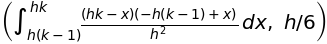

In [79]:
IA3 = sm.Integral((-(x-k*h)/h)*(x-(k-1)*h)/h, (x, (k-1)*h, k*h))
(IA3, sm.simplify(IA3.doit()))                #above

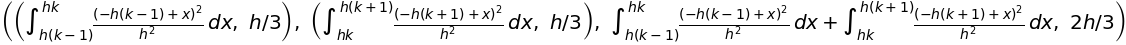

In [80]:
IA2 = (
    sm.Integral(
        ((x-(k-1)*h)/h)**2,
        (x, (k-1)*h, k*h)
    ) ,
    sm.Integral(((x-(k+1)*h)/h)**2, (x, (k)*h, (k+1)*h)))
(IA2[0], sm.simplify(IA2[0].doit())), (IA2[1], sm.simplify(IA2[1].doit())), sum(IA2), sm.simplify(sum(IA2).doit())  #middle

# 0, 0 and N, N has single value h/3 not 2h/3

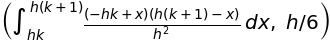

In [81]:
IA1 = sm.Integral((-(x-(k+1)*h)/h)* ((x-k*h)/h), (x, k*h, (k+1)*h)) 
(IA1, sm.simplify(IA1.doit()))   #bottom

In [82]:
def fA(i, j):
    if (i==j) and j in [0, N]:
        return h/3
    elif i==j:
        return 2*h/3
    elif abs(i-j) == 1:
        return h/6
    else:
        return 0
sm.Matrix(N+1, N+1, lambda i, j: fA(i, j))

⎡h   h              ⎤
⎢─   ─    0    0   0⎥
⎢3   6              ⎥
⎢                   ⎥
⎢h  2⋅h   h         ⎥
⎢─  ───   ─    0   0⎥
⎢6   3    6         ⎥
⎢                   ⎥
⎢    h   2⋅h   h    ⎥
⎢0   ─   ───   ─   0⎥
⎢    6    3    6    ⎥
⎢                   ⎥
⎢         h   2⋅h  h⎥
⎢0   0    ─   ───  ─⎥
⎢         6    3   6⎥
⎢                   ⎥
⎢              h   h⎥
⎢0   0    0    ─   ─⎥
⎣              6   3⎦

## B   (!!do not integrate)    calculated at point 1

In [72]:
sm.Matrix([[sm.Symbol(f"\phi_{i}^{{'}}(1)")* sm.Symbol(f"\phi_{j} (1)")\
            if abs(i-j) in[0, 1] and j==N  else 0 for j in range(N+1)] for i in range(N+1)])

⎡0  0  0  0  0              0            ⎤
⎢                                        ⎥
⎢0  0  0  0  0              0            ⎥
⎢                                        ⎥
⎢0  0  0  0  0              0            ⎥
⎢                                        ⎥
⎢0  0  0  0  0              0            ⎥
⎢                                        ⎥
⎢0  0  0  0  0  \phi_4__{'}(1)⋅\phi_5 (1)⎥
⎢                                        ⎥
⎣0  0  0  0  0  \phi_5 (1)⋅\phi_5__{'}(1)⎦

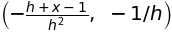

In [73]:
IB1 =  (((x-(1- h))/h) *(-1/h))   #(4, 5)
IB1, IB1.subs({x:1})

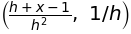

In [21]:
IB2 =  (((x-(1- h))/h) *(1/h))   #(5, 5)
IB2, IB2.subs({x:1})

In [22]:
def fB(i, j):
    if (i==j==N):  
        return 1/h
    elif i + 1 ==N and j== N :
        return -1/h
    else:
        return 0
sm.Matrix(N+1, N+1, lambda i, j: fB(i, j))

⎡0  0  0  0  0   0 ⎤
⎢                  ⎥
⎢0  0  0  0  0   0 ⎥
⎢                  ⎥
⎢0  0  0  0  0   0 ⎥
⎢                  ⎥
⎢0  0  0  0  0   0 ⎥
⎢                  ⎥
⎢               -1 ⎥
⎢0  0  0  0  0  ───⎥
⎢                h ⎥
⎢                  ⎥
⎢                1 ⎥
⎢0  0  0  0  0   ─ ⎥
⎣                h ⎦

## C   (!!do not integrate)    calculate at point 0

In [23]:
sm.Matrix([[sm.Symbol(f"\phi_{i}^{{'}}(0)")* sm.Symbol(f"\phi_{j} (0)")\
            if abs(i-j) in[0, 1] and j==0  else 0 for j in range(N+1)] for i in range(N+1)])

⎡\phi_0 (0)⋅\phi_0__{'}(0)  0  0  0  0  0⎤
⎢                                        ⎥
⎢\phi_0 (0)⋅\phi_1__{'}(0)  0  0  0  0  0⎥
⎢                                        ⎥
⎢            0              0  0  0  0  0⎥
⎢                                        ⎥
⎢            0              0  0  0  0  0⎥
⎢                                        ⎥
⎢            0              0  0  0  0  0⎥
⎢                                        ⎥
⎣            0              0  0  0  0  0⎦

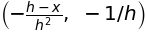

In [24]:
IC1 =  (-(x-h)/h) *(-1/h)  #(0, 0)
IC1, IC1.subs({x:0})

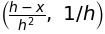

In [25]:
IC2 =  (-(x-h)/h) *(1/h)   #(1, 0)
IC2, IC2.subs({x:0})

In [26]:
def fC(i, j):
    if (i==j==0):  
        return -1/h
    elif i - 1 ==0 and j== 0 :
        return 1/h
    else:
        return 0
sm.Matrix(N+1, N+1, lambda i, j: fC(i, j))

⎡-1                ⎤
⎢───  0  0  0  0  0⎥
⎢ h                ⎥
⎢                  ⎥
⎢ 1                ⎥
⎢ ─   0  0  0  0  0⎥
⎢ h                ⎥
⎢                  ⎥
⎢ 0   0  0  0  0  0⎥
⎢                  ⎥
⎢ 0   0  0  0  0  0⎥
⎢                  ⎥
⎢ 0   0  0  0  0  0⎥
⎢                  ⎥
⎣ 0   0  0  0  0  0⎦

## D  integrate

In [27]:
sm.Matrix([[sm.Symbol(f"\int_0^1 \phi_{i}'")* sm.Symbol(f"phi_{j}^'")\
            if abs(i-j) in [0, 1]  else 0 for j in range(N+1)] for i in range(N+1)]) # D

⎡\int_0_0'__1 \phi⋅φ_0__'  \int_0_0'__1 \phi⋅φ_1__'             0             
⎢                                                                             
⎢\int_0_1'__1 \phi⋅φ_0__'  \int_0_1'__1 \phi⋅φ_1__'  \int_0_1'__1 \phi⋅φ_2__' 
⎢                                                                             
⎢           0              \int_0_2'__1 \phi⋅φ_1__'  \int_0_2'__1 \phi⋅φ_2__' 
⎢                                                                             
⎢           0                         0              \int_0_3'__1 \phi⋅φ_2__' 
⎢                                                                             
⎢           0                         0                         0             
⎢                                                                             
⎣           0                         0                         0             

            0                         0                         0            ⎤
                                                   

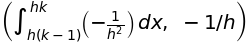

In [28]:
IA1 = sm.Integral((-1/h)*(1/h), (x, (k-1)*h, k*h))
(IA1, sm.simplify(IA1.doit()))                #above

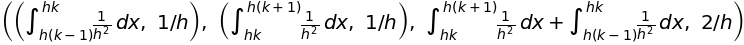

In [29]:
IA2 = (sm.Integral((1/h)**2, (x, (k-1)*h, k*h)) , sm.Integral((1/h)**2, (x, (k)*h, (k+1)*h)))
(IA2[0], sm.simplify(IA2[0].doit())), (IA2[1], sm.simplify(IA2[1].doit())), sum(IA2), sm.simplify(sum(IA2).doit())  #middle

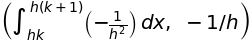

In [30]:
IA3 = sm.Integral((-1/h)* (1/h), (x, k*h, (k+1)*h)) 
(IA3, sm.simplify(IA3.doit()))   #bottom

<h1><u> Integral Calculator</u></h1>

<html><h1 style="color:#cc0c36;">Code Begins</h1></html>

In [32]:
#No of basis functions
N = 20

# x step size
h = 1/N

# constant
beta = -.5


A = sp.csc_matrix(diags([     [h/3, *[2*h/3]*(N-1), h/3], \
                              [h/6]*(N),         \
                              [h/6]*(N)],               [0, 1, -1] ))

B = sp.csc_matrix( ([-1/h, 1/h],([N, N-1], [N, N]),), shape=(N+1, N+1) )

C = sp.csc_matrix( ([-1/h, 1/h],([1, 0], [0, 0])), shape=(N+1, N+1) )

D = sp.csc_matrix(diags([     [1/h, *[2/h]*(N-1), 1/h], \
                              [-1/h]*(N),         \
                              [-1/h]*(N)],               [0, 1, -1] ))

alpha = np.array([np.sin((x+1)*np.pi/2) - np.cos((x+1)*np.pi/2)   for x in np.linspace(0, 1, N+1) ]).reshape(-1, 1)


In [33]:
A.todense()

matrix([[0.01666667, 0.00833333, 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00833333, 0.03333333, 0.00833333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.00833333, 0.03333333, 0.00833333, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00833333, 0.03333333, 0.00833333, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        

In [34]:
B.todense()

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.

In [35]:
C.todense()

matrix([[ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [-20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.

In [36]:
D.todense()

matrix([[ 20., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [-20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.

In [37]:
alpha

array([[1.        ],
       [1.07537643],
       [1.14412281],
       [1.20581528],
       [1.26007351],
       [1.30656296],
       [1.34499702],
       [1.37513873],
       [1.39680225],
       [1.40985401],
       [1.41421356],
       [1.40985401],
       [1.39680225],
       [1.37513873],
       [1.34499702],
       [1.30656296],
       [1.26007351],
       [1.20581528],
       [1.14412281],
       [1.07537643],
       [1.        ]])

# Eqn form: a1 1 + a2 x2 + a3 x3 ....   a(n-1) x(n-1) + an 1 = 0
#                 a2 x2 + a3 x3 ....   a(n-1) x(n-1) =  -( an 1  +a1 1 )

\begin{equation}
\\  A \alpha^{'}  +\beta ( B \alpha  - C \alpha)  - \beta D  \alpha  = 0 \thinspace\thinspace\thinspace  
\\ \text {Cropping  \( 0^{th} \)  and \( N^{th} \) rows since we know that at boundary values are 1}
\\ \text {Now cropping \( 0^{th} \)  and \( N^{th} \) columns  and shifting to other side as done in header to get matrix in that form}
\\ \text {Equation system now becomes like \(2^{nd} \) equation in header and matrices get reduced to (n - 1) \(\times \) (n-1) dimensions}
\\ \text {New equation system :} 
\ \hspace{250mm}
\\ \text {\(\tilde{A} \) \(\tilde{\alpha^{'}} \) + \( \beta \) ( \(\tilde{B} \)  - \(\tilde{C} \)  -  \(\tilde{D} \)) \(\tilde{\alpha} \) +\(\ sliced \)= 0}  
\end{equation}

In [42]:
l = list(range(0, 20, 2))

In [48]:
l[1:]

In [49]:
A

<21x21 sparse matrix of type '<class 'numpy.float64'>'
	with 61 stored elements in Compressed Sparse Column format>

In [50]:
A_ = A[1:-1, 1: -1]
B_ = B[1:-1, 1: -1]
C_ = C[1:-1, 1: -1]
D_ = D[1:-1, 1: -1]
alpha_ = alpha[1:-1]
sliced = beta *(  (B[1:-1, 0]+ B[1:-1, -1]) - (C[1:-1, 0]+ C[1:-1, -1]) - (D[1:-1, 0]+ D[1:-1, -1]))

In [51]:
A_.todense()


matrix([[0.03333333, 0.00833333, 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00833333, 0.03333333, 0.00833333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.00833333, 0.03333333, 0.00833333, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00833333, 0.03333333, 0.00833333, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0

In [52]:
B_.todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [178]:
C_.todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [179]:
D_.todense()

matrix([[ 40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [-20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -20.,  40., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., -20.,  40., -20.,   0., 

In [180]:
sliced.todense()

matrix([[-20.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [-20.]])

\begin{equation}
\\ \text {\(\tilde{A} \) \(\tilde{\alpha^{'}} \) + \( \beta \) ( \(\tilde{B} \)  - \(\tilde{C} \)  -  \(\tilde{D} \)) \(\tilde{\alpha} \) +\(\ sliced \)= 0}  
\\  \implies \tilde{A} \tilde{\alpha^{'}} +\beta( \tilde{B}  - \tilde{C }- \tilde{D} )) \tilde{\alpha} + sliced = 0
\\  \hspace{8mm} \implies  \tilde{\alpha^{'}} =  - \tilde{A^{-1}}  [ \beta ( ( \tilde{ B} \ - \tilde{ C} -\tilde{ D} )) \tilde{\alpha}+ \ sliced) ] 
\end{equation}

In [53]:

#  _ denotes ~(tilda) 
# alpha_ is denoted by y

def f(y):
    return -la.inv(A_).dot( beta * (( B_ - C_ - D_).dot(y)) + sliced)

In [54]:
step_size = h**2 #time step

runs = 3 #no of iterations

t_=0

y = alpha_

for i in range(runs):
    k1 = f( y)
    k2 = f( y+.5*k1*h)
    k3 = f(y+.5*k2*h)
    k4 = f( y+k3*h)
    y_new = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*step_size
    y_new = y
    t_ = t_ + h**2
    print("Iteration ",  i+1,"  t  : ", t_)
    time.sleep(.1)
    

Iteration  1   t  :  0.0025000000000000005
Iteration  2   t  :  0.005000000000000001
Iteration  3   t  :  0.0075000000000000015


\begin{equation}
\ u^{h}
\end{equation}

In [55]:
u_h = y
u_h.ravel()

array([1.07537643, 1.14412281, 1.20581528, 1.26007351, 1.30656296, 1.34499702, 1.37513873,
       1.39680225, 1.40985401, 1.41421356, 1.40985401, 1.39680225, 1.37513873, 1.34499702,
       1.30656296, 1.26007351, 1.20581528, 1.14412281, 1.07537643])

\begin{equation}
\ u
\end{equation}

In [56]:
u = alpha_*np.exp(-t_)

In [57]:
u.ravel()

array([1.06734128, 1.13557398, 1.1968055 , 1.25065831, 1.2968004 , 1.33494728, 1.36486377,
       1.38636542, 1.39931966, 1.40364664, 1.39931966, 1.38636542, 1.36486377, 1.33494728,
       1.2968004 , 1.25065831, 1.1968055 , 1.13557398, 1.06734128])

# Max Error

In [58]:
max(abs(u - u_h))

array([0.01056693])

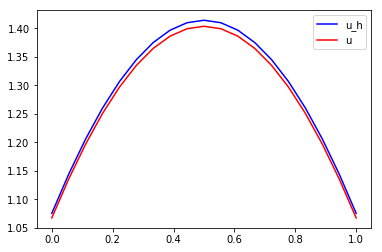

In [59]:
plt.plot(np.linspace(0, 1, N+1-2), u_h,"b-", np.linspace(0, 1, N+1-2), u, "r-")
plt.legend(["u_h", "u"])